Manuel Viana
Deep Learning
Pré-Processamento

In [ ]:
# Importar as  bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [24]:
#Importar os dados
dataset = pd.read_csv('Data2.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [25]:
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, nan],
       ['France', 35.0, 58000.0],
       ['Spain', nan, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0],
       ['França', 44.0, 72000.0],
       ['Espanha', 27.0, 48000.0],
       ['Alemanha', 30.0, 54000.0],
       ['Espanha', 38.0, 61000.0],
       ['Alemanha', 40.0, 68000.0],
       ['França', 35.0, 58000.0],
       ['Espanha', 45.0, nan],
       ['França', 48.0, 79000.0],
       ['Alemanha', 50.0, 83000.0],
       ['França', 37.0, 67000.0]], dtype=object)

In [26]:
y

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes',
       'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'],
      dtype=object)

In [27]:
# Substitui valores dos faltantes
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy = 'mean')
imputer = imputer.fit(X[:, 1:3])
X[:, 1:3] = imputer.transform(X[:, 1:3])

In [28]:
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 64666.666666666664],
       ['France', 35.0, 58000.0],
       ['Spain', 39.10526315789474, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0],
       ['França', 44.0, 72000.0],
       ['Espanha', 27.0, 48000.0],
       ['Alemanha', 30.0, 54000.0],
       ['Espanha', 38.0, 61000.0],
       ['Alemanha', 40.0, 68000.0],
       ['França', 35.0, 58000.0],
       ['Espanha', 45.0, 64666.666666666664],
       ['França', 48.0, 79000.0],
       ['Alemanha', 50.0, 83000.0],
       ['França', 37.0, 67000.0]], dtype=object)

In [38]:
# Transforma categorias em valores numéricos
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
labelencoder_X = LabelEncoder()
X[:, 0] = labelencoder_X.fit_transform(X[:, 0])
ct = ColumnTransformer([("Country", OneHotEncoder(), [0])], remainder = 'passthrough')
X = ct.fit_transform(X)

In [30]:
X

array([[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 44.0, 72000.0],
       [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 27.0, 48000.0],
       [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 30.0, 54000.0],
       [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 40.0, 64666.666666666664],
       [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 35.0, 58000.0],
       [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 39.10526315789474, 52000.0],
       [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 50.0, 83000.0],
       [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 37.0, 67000.0],
       [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 44.0, 72000.0],
       [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 27.0, 48000.0],
       [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 30.0, 54000.0],
       [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 38.0, 61000.0],
       [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 40.0, 68000.0],
       [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 35.0, 58000.0],
       [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 45.0, 64666.666666666664],
       [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 48.0, 790

In [31]:
#Transforma a Classe
labelencoder_y = LabelEncoder()
y = labelencoder_X.fit_transform(y)

In [32]:
y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

In [33]:
#Divide em Treino e Teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [34]:
X_train, X_test

(array([[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 39.10526315789474, 52000.0],
        [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 38.0, 61000.0],
        [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 40.0, 64666.666666666664],
        [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 30.0, 54000.0],
        [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 35.0, 58000.0],
        [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 40.0, 68000.0],
        [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 37.0, 67000.0],
        [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 48.0, 79000.0],
        [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 45.0, 64666.666666666664],
        [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 27.0, 48000.0],
        [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 38.0, 61000.0],
        [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 44.0, 72000.0],
        [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 35.0, 58000.0],
        [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 30.0, 54000.0]], dtype=object),
 array([[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 50.0, 83000.0],
        [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 27.0, 48000.0],
        [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 37.0, 67000.0],
        [0.0, 

In [35]:
# Padroniza os dados de teste
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [36]:
X_train

array([[-0.40824829, -0.52223297, -0.63245553, -0.2773501 , -0.40824829,
         2.44948974,  0.26634985, -1.1754542 ],
       [-0.40824829,  1.91485422, -0.63245553, -0.2773501 , -0.40824829,
        -0.40824829,  0.07347582, -0.06464998],
       [-0.40824829, -0.52223297, -0.63245553, -0.2773501 ,  2.44948974,
        -0.40824829,  0.42248596,  0.38789989],
       [-0.40824829, -0.52223297, -0.63245553, -0.2773501 ,  2.44948974,
        -0.40824829, -1.32256476, -0.92860882],
       [-0.40824829, -0.52223297,  1.58113883, -0.2773501 , -0.40824829,
        -0.40824829, -0.4500394 , -0.43491805],
       [ 2.44948974, -0.52223297, -0.63245553, -0.2773501 , -0.40824829,
        -0.40824829,  0.42248596,  0.79930886],
       [-0.40824829, -0.52223297,  1.58113883, -0.2773501 , -0.40824829,
        -0.40824829, -0.10102925,  0.67588616],
       [-0.40824829, -0.52223297,  1.58113883, -0.2773501 , -0.40824829,
        -0.40824829,  1.81852654,  2.15695845],
       [-0.40824829,  1.91485422

Faça um gráfico pairplot comparativo da amostra de treino 2 a 2.

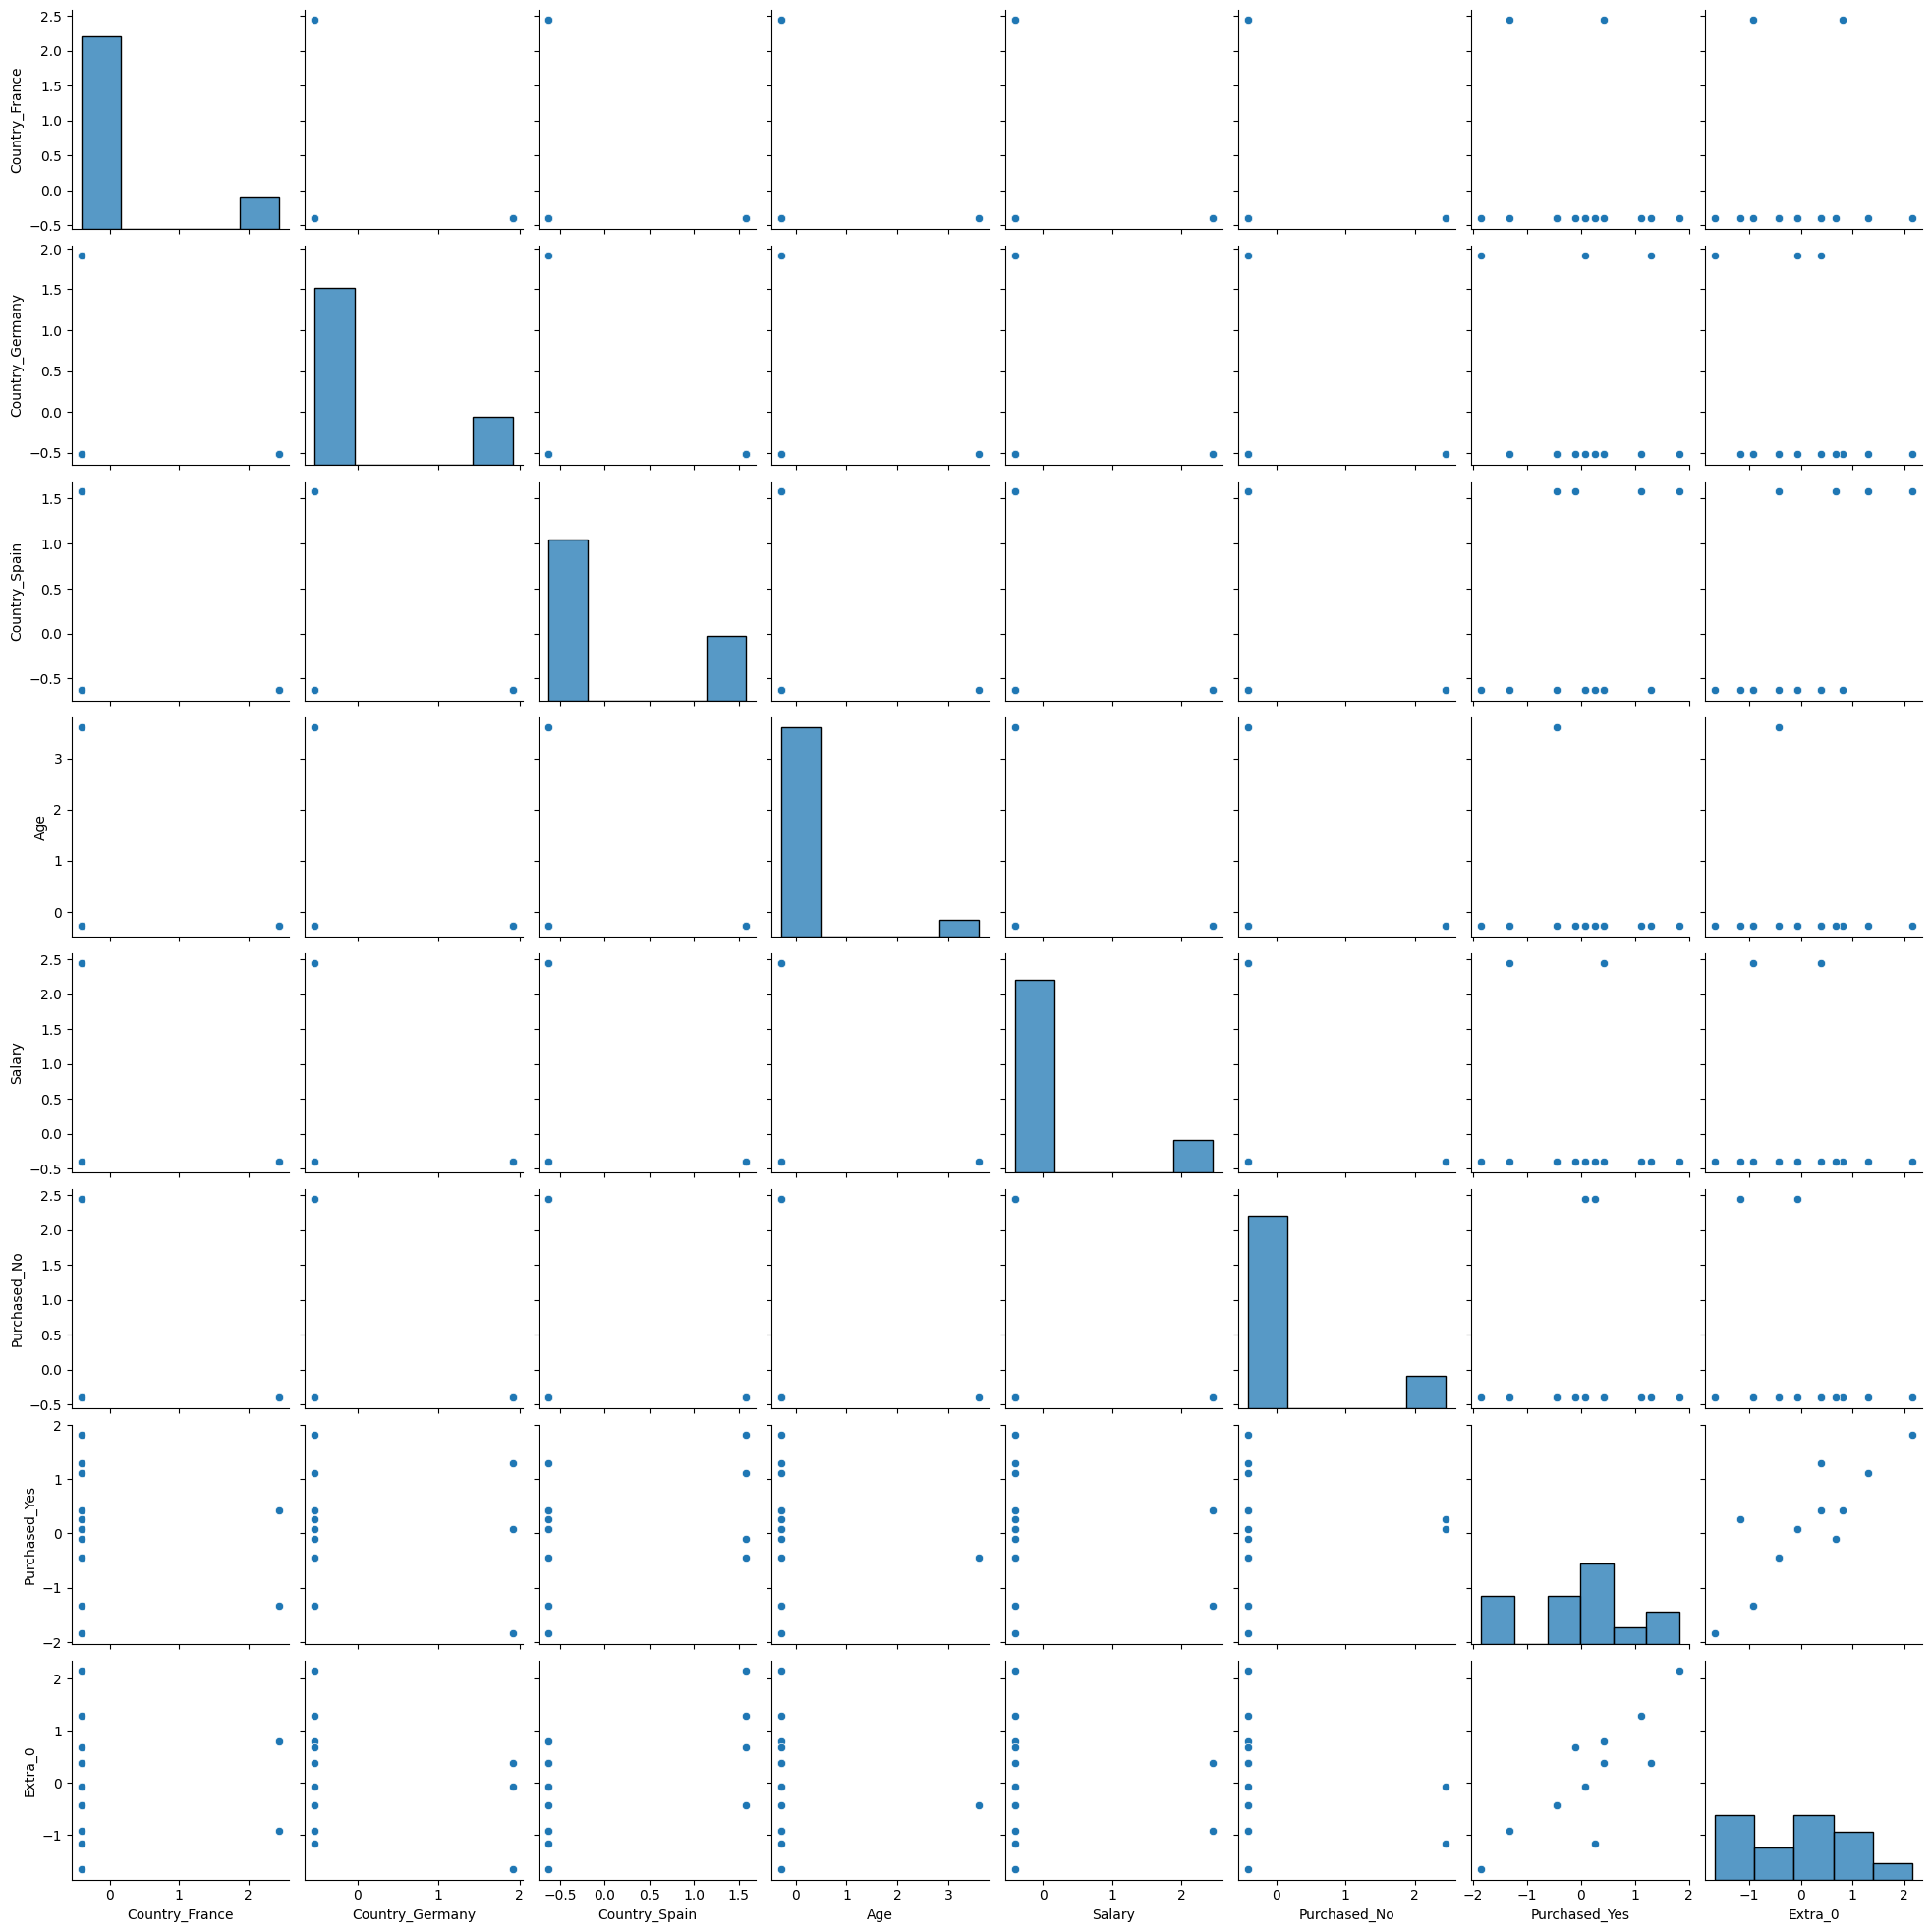

In [41]:
num_columns = X_train.shape[1]


column_names = ['Country_France', 'Country_Germany', 'Country_Spain', 'Age', 'Salary', 'Purchased_No', 'Purchased_Yes']


if num_columns > len(column_names):
    column_names.extend([f'Extra_{i}' for i in range(num_columns - len(column_names))])

df_train = pd.DataFrame(X_train, columns=column_names)

sns.pairplot(df_train)
plt.show()